In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
######################

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/Research/FFF/Train'
valid_path = '/content/drive/MyDrive/Research/FFF/Test'


In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Research/FFF/Train/*')

In [ ]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)


In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research/FFF/Test',
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 3835 images belonging to 11 classes.
Found 764 images belonging to 11 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
30/30 [==============================] - 1544s 51s/step - loss: 1.7125 - accuracy: 0.4780 - val_loss: 1.0914 - val_accuracy: 0.6440
Epoch 2/25
30/30 [==============================] - 60s 2s/step - loss: 0.6293 - accuracy: 0.8263 - val_loss: 0.8829 - val_accuracy: 0.7487
Epoch 3/25
30/30 [==============================] - 60s 2s/step - loss: 0.4293 - accuracy: 0.8973 - val_loss: 0.7064 - val_accuracy: 0.8010
Epoch 4/25
30/30 [==============================] - 60s 2s/step - loss: 0.3339 - accuracy: 0.9213 - val_loss: 0.5963 - val_accuracy: 0.8285
Epoch 5/25
30/30 [==============================] - 59s 2s/step - loss: 0.2686 - accuracy: 0.9411 - val_loss: 0.5457 - val_accuracy: 0.8351
Epoch 6/25
30/30 [==============================] - 59s 2s/step - loss: 0.2371 - accuracy: 0.9502 - val_loss: 0.5254 - val_accuracy: 0.8377
Epoch 7/25
30/30 [==============================] - 60s 2s/step - loss: 0.1976 - accuracy: 0.9625 - val_loss: 0.5319 - val_accuracy: 0.8469
Epoch 8/25
30/30 

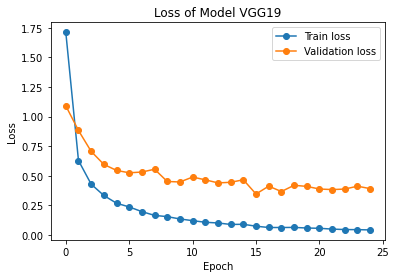

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'],'o-', label='Train loss')
plt.plot(r.history['val_loss'],'o-', label='Validation loss')
plt.title("Loss of Model VGG19")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss2')





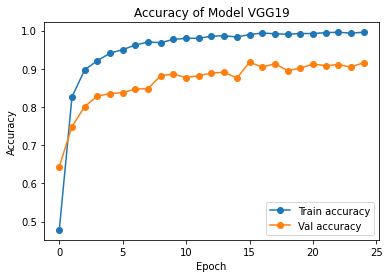

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy
plt.plot(r.history['accuracy'],'o-', label='Train accuracy')
plt.plot(r.history['val_accuracy'],'o-', label='Val accuracy')
plt.title("Accuracy of Model VGG19")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


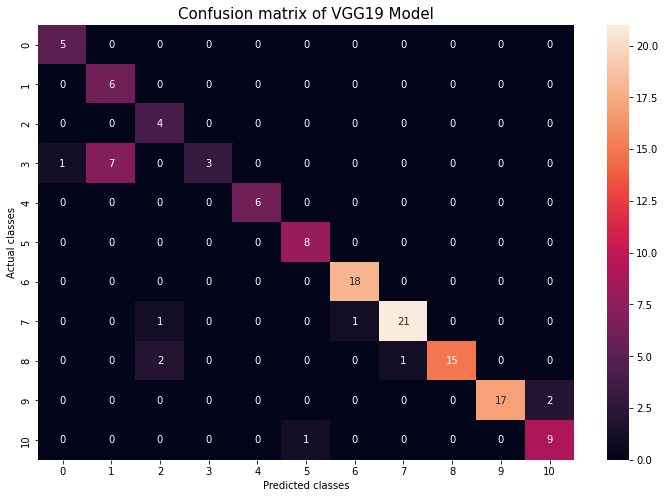

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_ds = test_set
x_test, y_test = next(val_ds)
y_predict = model.predict(x_test)
classes = np.argmax(y_predict, axis = 1)
test = np.argmax(y_test, axis = 1)

cf = confusion_matrix(test, classes)
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf, annot= True )

plt.title('Confusion matrix of VGG19 Model', fontsize = 15) 
plt.xlabel('Predicted classes', fontsize = 10) 
plt.ylabel('Actual classes', fontsize = 10) 

plt.show()

In [ ]:

import tensorflow as tf

from keras.models import load_model

model.save('25_vgg19_VGG19_facefeatures_new_model.h5')

In [ ]:
########

In [ ]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(classes,test))

the accuracy obtained on the test set is: 0.875


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test, classes))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.46      1.00      0.63         6
           2       0.57      1.00      0.73         4
           3       1.00      0.27      0.43        11
           4       1.00      1.00      1.00         6
           5       0.89      1.00      0.94         8
           6       0.95      1.00      0.97        18
           7       0.95      0.91      0.93        23
           8       1.00      0.83      0.91        18
           9       1.00      0.89      0.94        19
          10       0.82      0.90      0.86        10

    accuracy                           0.88       128
   macro avg       0.86      0.89      0.84       128
weighted avg       0.92      0.88      0.87       128



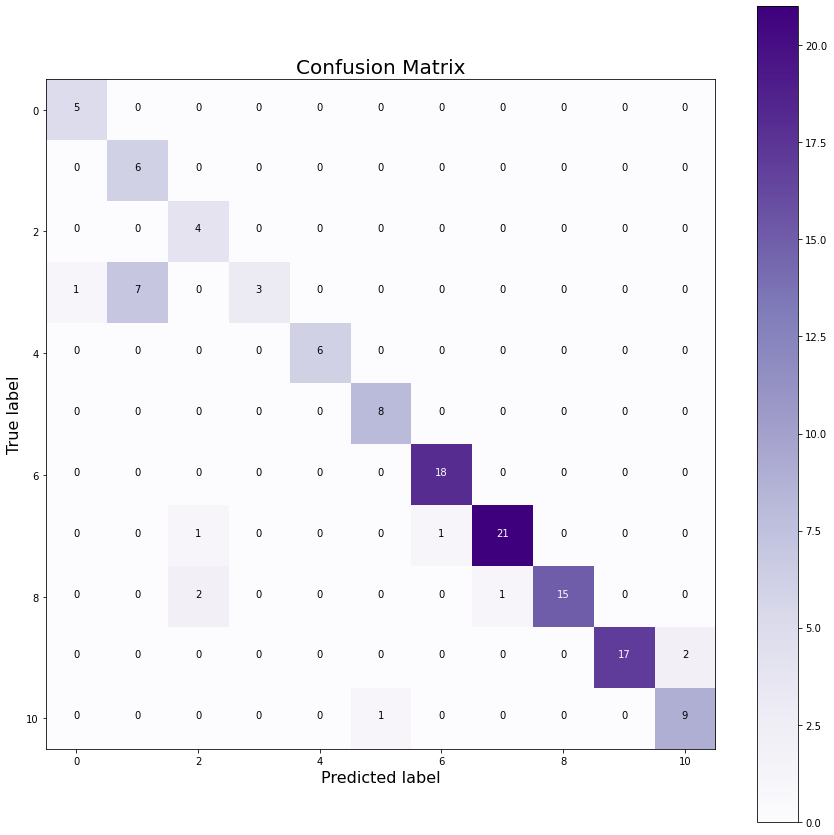

In [ ]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    #tick_marks = np.arange(len(labels))
    #plt.xticks(tick_marks, labels, rotation=45)
    #plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(x_test, batch_size = 128, verbose = 0)
plot_confusion_matrix(test, classes)

In [ ]:
##### End #####